In [1]:
import os
#os.environ["JAX_PLATFORMS"] = "cpu"
import sys
sys.path.append("..")

#import jax
#jax.config.update("jax_enable_x64", True)

from utils import *
from model_tn import *
from keras_utils import *
from jax_utils import *

keras.mixed_precision.set_global_policy("mixed_float16")

In [3]:
class TSCANToEnd(keras.Model):
    
    def __init__(self, model):
        super().__init__()
        self.inner = model
    
    def call(self, x, training=None, *args, **kw):
        x_ = x[:, 1:] - x[:, :-1]
        x_ = (x_ - ops.mean(x_, axis=(2, 3), keepdims=True))/(ops.std(x_, axis=(2, 3), keepdims=True)+1e-6)
        return self.inner((ops.concatenate([x_, x_[:, -1:]], axis=1), ops.mean(x, axis=(1, ), keepdims=True)), training=training, *args, **kw)

tscan = TSCANToEnd(TSCAN())
tscan(np.random.random((4, 160, 36, 36, 3)));
tscan.load_weights('../weights/tscan.weights.h5')

class TSCANToEnd(keras.Model):
    
    def __init__(self, model):
        super().__init__()
        self.inner = model
    
    def call(self, x, training=None, *args, **kw):
        return self.inner((x, ops.mean(x, axis=(1, ), keepdims=True)), training=training, *args, **kw)

tscantn = TSCANToEnd(TSCAN(TN=True))
tscantn(np.random.random((4, 160, 36, 36, 3)));
tscantn.load_weights('../weights/tscantn.weights.h5')

In [19]:
tape = load_datatape("/root/ssd_cache/rppg_training_data/pure_160x36x36_all", fold='val', batch=4)
x, y = next(iter(tape))

pred, attn1, attn2 = tscan(x, return_attn=True)
predtn, attn1tn, attn2tn = tscantn(x, return_attn=True)
x = x.astype('float32')
attn1 = [cv2.resize(np.array(attn1[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2 = [cv2.resize(np.array(attn2[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn1tn = [cv2.resize(np.array(attn1tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2tn = [cv2.resize(np.array(attn2tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]

pure_img = x[0, 80]
pure_attn1 = attn1[0]
pure_attn2 = attn2[0]
pure_attn1tn = attn1tn[0]
pure_attn2tn = attn2tn[0]

tape = load_datatape("/root/ssd_cache/rppg_training_data/ubfc_160x36x36_all", fold='val', batch=4)
x, y = next(iter(tape))

pred, attn1, attn2 = tscan(x, return_attn=True)
predtn, attn1tn, attn2tn = tscantn(x, return_attn=True)
x = x.astype('float32')
attn1 = [cv2.resize(np.array(attn1[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2 = [cv2.resize(np.array(attn2[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn1tn = [cv2.resize(np.array(attn1tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2tn = [cv2.resize(np.array(attn2tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]

ubfc_img = x[0, 80]
ubfc_attn1 = attn1[0]
ubfc_attn2 = attn2[0]
ubfc_attn1tn = attn1tn[0]
ubfc_attn2tn = attn2tn[0]

tape = load_datatape("/root/ssd_cache/rppg_training_data/rlap_160x36x36_all", fold='val', batch=4)
x, y = next(iter(tape))

pred, attn1, attn2 = tscan(x, return_attn=True)
predtn, attn1tn, attn2tn = tscantn(x, return_attn=True)
x = x.astype('float32')
attn1 = [cv2.resize(np.array(attn1[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2 = [cv2.resize(np.array(attn2[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn1tn = [cv2.resize(np.array(attn1tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2tn = [cv2.resize(np.array(attn2tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]

rlap_img = x[0, 80]
rlap_attn1 = attn1[0]
rlap_attn2 = attn2[0]
rlap_attn1tn = attn1tn[0]
rlap_attn2tn = attn2tn[0]

tape = load_datatape("/root/ssd_cache/rppg_training_data/mmpd_160x36x36_all", fold='val', batch=4)
x, y = next(iter(tape))

pred, attn1, attn2 = tscan(x, return_attn=True)
predtn, attn1tn, attn2tn = tscantn(x, return_attn=True)
x = x.astype('float32')
attn1 = [cv2.resize(np.array(attn1[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2 = [cv2.resize(np.array(attn2[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn1tn = [cv2.resize(np.array(attn1tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2tn = [cv2.resize(np.array(attn2tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]

mmpd_img = x[0, 80]
mmpd_attn1 = attn1[0]
mmpd_attn2 = attn2[0]
mmpd_attn1tn = attn1tn[0]
mmpd_attn2tn = attn2tn[0]

tape = load_datatape("/root/ssd_cache/rppg_training_data/cohface_160x36x36_all", fold='val', batch=4)
x, y = next(iter(tape))

pred, attn1, attn2 = tscan(x, return_attn=True)
predtn, attn1tn, attn2tn = tscantn(x, return_attn=True)
x = x.astype('float32')
attn1 = [cv2.resize(np.array(attn1[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2 = [cv2.resize(np.array(attn2[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn1tn = [cv2.resize(np.array(attn1tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]
attn2tn = [cv2.resize(np.array(attn2tn[i].astype('float32')), x.shape[-3:-1]) for i in range(len(attn1))]

cohface_img = x[0, 80]
cohface_attn1 = attn1[0]
cohface_attn2 = attn2[0]
cohface_attn1tn = attn1tn[0]
cohface_attn2tn = attn2tn[0]

pure_160x36x36_all             datatape has been loaded.      248 items total. fold=val selected
ubfc_160x36x36_all             datatape has been loaded.      188 items total. fold=val selected
rlap_160x36x36_all             datatape has been loaded.     4032 items total. fold=val selected
mmpd_160x36x36_all             datatape has been loaded.     2200 items total. fold=val selected
cohface_160x36x36_all          datatape has been loaded.      912 items total. fold=val selected


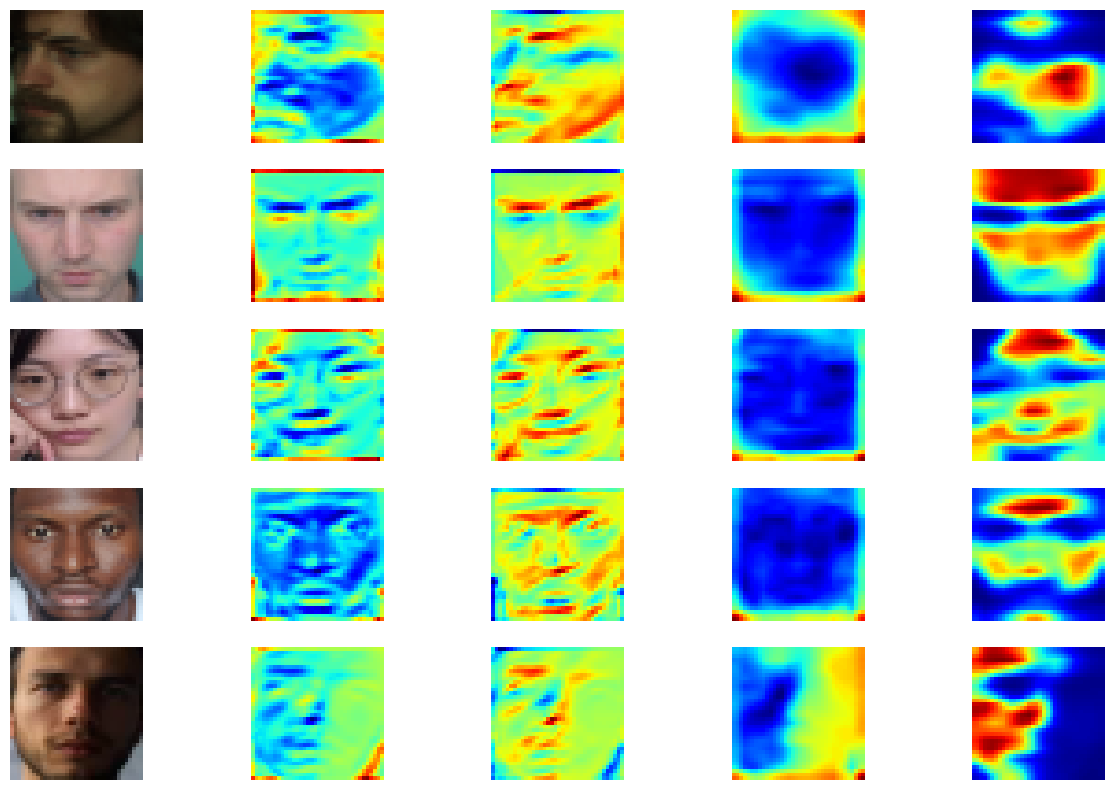

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 5, figsize=(15, 10))

ax = axes[0, 0]
ax.axis('off')
ax.imshow(pure_img)
#ax.title("Image")

ax = axes[0, 1]
ax.axis('off')
ax.imshow(pure_attn1, cmap='jet')
#ax.title("Shallow attn wo/TN")

ax = axes[0, 3]
ax.axis('off')
ax.imshow(pure_attn2, cmap='jet')
#ax.title("Deep attn wo/TN")

ax = axes[0, 2]
ax.axis('off')
ax.imshow(pure_attn1tn, cmap='jet')
#ax.title("Shallow attn w/TN")

ax = axes[0, 4]
ax.axis('off')
ax.imshow(pure_attn2tn, cmap='jet')
#ax.title("Deep attn w/TN")

ax = axes[1, 0]
ax.axis('off')
ax.imshow(ubfc_img)

ax = axes[1, 1]
ax.axis('off')
ax.imshow(ubfc_attn1, cmap='jet')

ax = axes[1, 3]
ax.axis('off')
ax.imshow(ubfc_attn2, cmap='jet')

ax = axes[1, 2]
ax.axis('off')
ax.imshow(ubfc_attn1tn, cmap='jet')

ax = axes[1, 4]
ax.axis('off')
ax.imshow(ubfc_attn2tn, cmap='jet')

ax = axes[2, 0]
ax.axis('off')
ax.imshow(rlap_img)

ax = axes[2, 1]
ax.axis('off')
ax.imshow(rlap_attn1, cmap='jet')

ax = axes[2, 3]
ax.axis('off')
ax.imshow(rlap_attn2, cmap='jet')

ax = axes[2, 2]
ax.axis('off')
ax.imshow(rlap_attn1tn, cmap='jet')

ax = axes[2, 4]
ax.axis('off')
ax.imshow(rlap_attn2tn, cmap='jet')

ax = axes[3, 0]
ax.axis('off')
ax.imshow(mmpd_img)

ax = axes[3, 1]
ax.axis('off')
ax.imshow(mmpd_attn1, cmap='jet')

ax = axes[3, 3]
ax.axis('off')
ax.imshow(mmpd_attn2, cmap='jet')

ax = axes[3, 2]
ax.axis('off')
ax.imshow(mmpd_attn1tn, cmap='jet')

ax = axes[3, 4]
ax.axis('off')
ax.imshow(mmpd_attn2tn, cmap='jet')

ax = axes[4, 0]
ax.axis('off')
ax.imshow(cohface_img)

ax = axes[4, 1]
ax.axis('off')
ax.imshow(cohface_attn1, cmap='jet')

ax = axes[4, 3]
ax.axis('off')
ax.imshow(cohface_attn2, cmap='jet')

ax = axes[4, 2]
ax.axis('off')
ax.imshow(cohface_attn1tn, cmap='jet')

ax = axes[4, 4]
ax.axis('off')
ax.imshow(cohface_attn2tn, cmap='jet')

#plt.suptitle("Test")
plt.show()

In [90]:
n=1
tape = load_datatape("/root/ssd_cache/rppg_training_data/pure_160x36x36_all", fold='val', batch=4)
x, y = next(iter(tape))

pure_160x36x36_all             datatape has been loaded.      248 items total. fold=val selected


In [91]:
def img_mean(img):
    r = np.zeros_like(img)
    r[...] = img.mean(axis=(0, 1))
    return r

img = np.concatenate([x[0][i] for i in range(0, 60, 5)], axis=1).astype('float32')
imgavg = np.concatenate([img_mean(x[0][i]) for i in range(0, 60, 5)], axis=1).astype('float32')
imgtn = ops.sigmoid(np.concatenate([TNM(True, axis=0, frames=160)(x[0])[i] for i in range(0, 60, 5)], axis=1).astype('float32'))
imgtnavg = ops.sigmoid(np.concatenate([img_mean(TNM(True, axis=0, frames=160)(x[0])[i]) for i in range(0, 60, 5)], axis=1).astype('float32'))
img_ = np.concatenate([img,imgavg, imgtn, imgtnavg], axis=0)

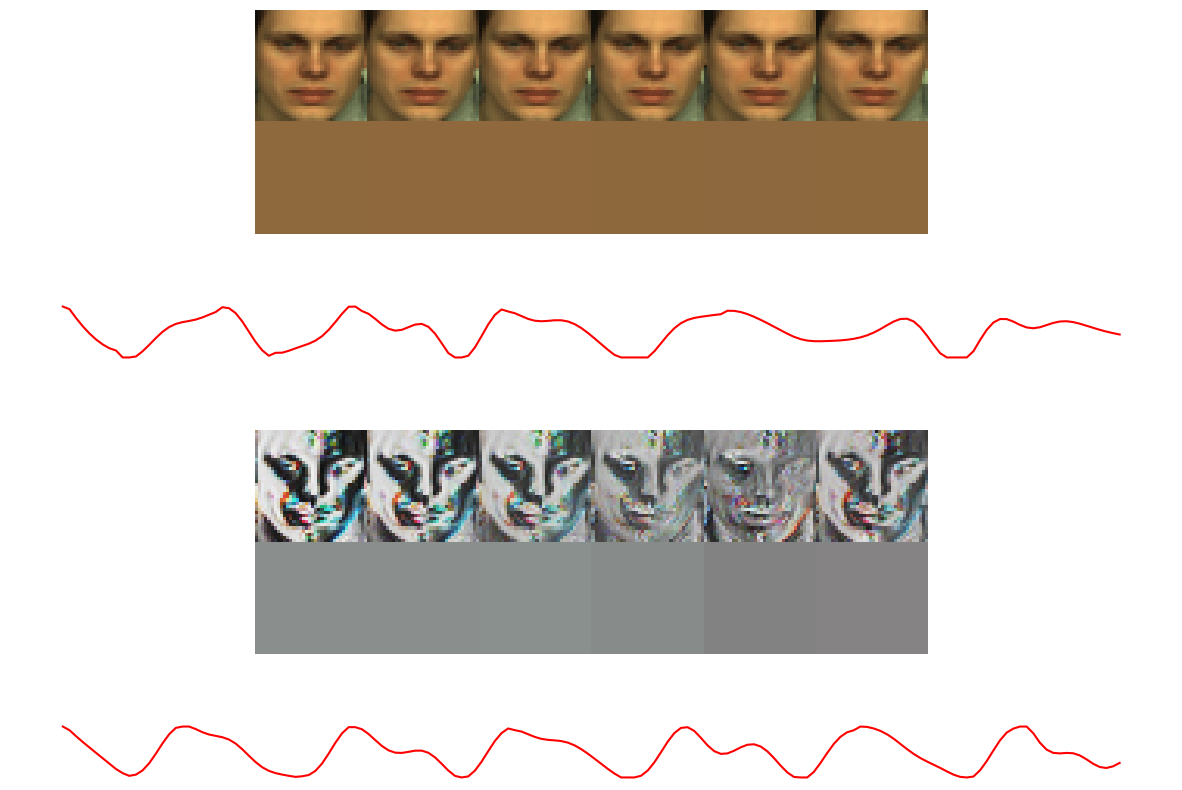

In [93]:
import matplotlib.gridspec as gridspec
y1 = norm_bvp(bandpass_filter(np.cumsum(tscan(x[0][None])[0])))
y2 = norm_bvp(bandpass_filter(tscantn(x[0][None])[0]))

plt.figure(figsize=(15, 10));
gs = gridspec.GridSpec(4, 1, height_ratios=[4, 1, 4, 1], hspace=0.5)

ax1 = plt.subplot(gs[0])
ax1.axis('off');
ax1.imshow(np.concatenate([img,imgavg], axis=0)[:,:36*6]);

ax2 = plt.subplot(gs[1])
ax2.axis('off');
#ax2.set_xlim(0, 60)
ax2.plot(y1, color='r')

ax3 = plt.subplot(gs[2])
ax3.axis('off');
ax3.imshow(np.concatenate([imgtn,imgtnavg], axis=0)[:,:36*6]);

ax4 = plt.subplot(gs[3])
ax4.axis('off');
#ax4.set_xlim(0, 60)
ax4.plot(y2, color='r')

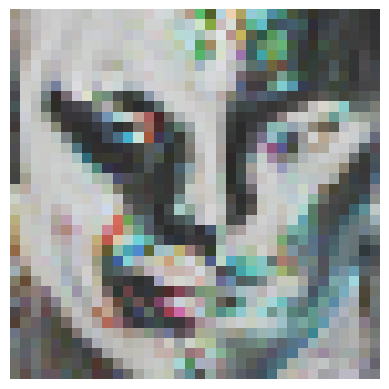

In [105]:
plt.axis('off')
plt.imshow(imgtn[:,36*2:36*3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


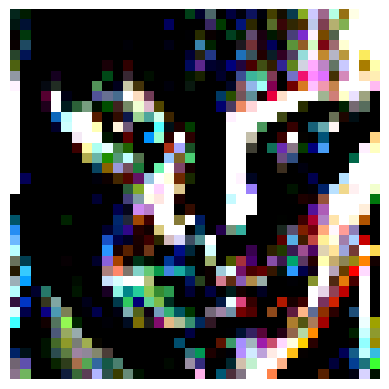

In [102]:
n = 3
_ = img[:, n*36+36:n*36+72] - img[:, n*36:n*36+36]
_ = (_-_.mean(axis=(0, 1), keepdims=True))/_.std(axis=(0, 1))
plt.axis('off')
plt.imshow(_)

In [124]:
i = img.reshape((36, -1, 36, 3)).transpose((1, 0, 2, 3))

In [134]:
x[0].mean(axis=0).shape

(36, 36, 3)

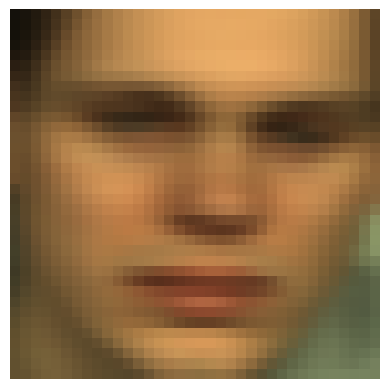

In [135]:
plt.axis('off')
plt.imshow(x[0].mean(axis=0).astype('float32'))

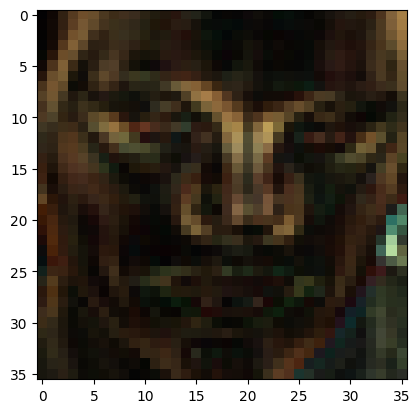

In [131]:
plt.imshow((i - i.mean(axis=0)).std(axis=0)*5)

In [116]:
img.shape

(36, 432, 3)

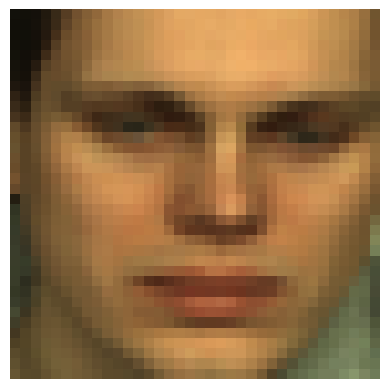

In [104]:
n = 3
_ = img[:, n*36+36:n*36+72]
#_ = (_-_.mean(axis=(0, 1), keepdims=True))/_.std(axis=(0, 1))
plt.axis('off')
plt.imshow(_)

In [ ]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(15, 10));
gs = gridspec.GridSpec(2, 1, height_ratios=[8, 1], hspace=-0.5)

ax1 = plt.subplot(gs[0])
ax1.axis('off');
ax1.imshow(img_);

ax2 = plt.subplot(gs[1])
ax2.axis('off');
ax2.set_xlim(0, 60)
ax2.plot(y[...,:60], color='r')

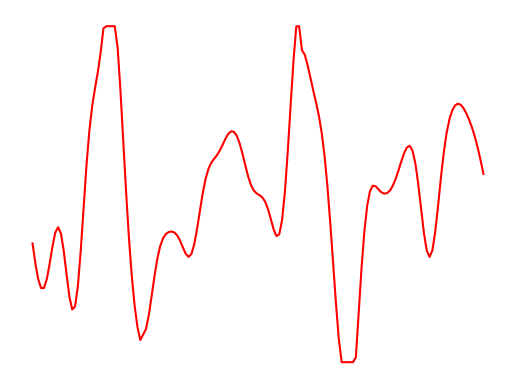

In [122]:
y1 = norm_bvp(bandpass_filter(np.cumsum(tscan(x[0][None])[0])))
plt.axis('off');
plt.plot(y1, c='r')

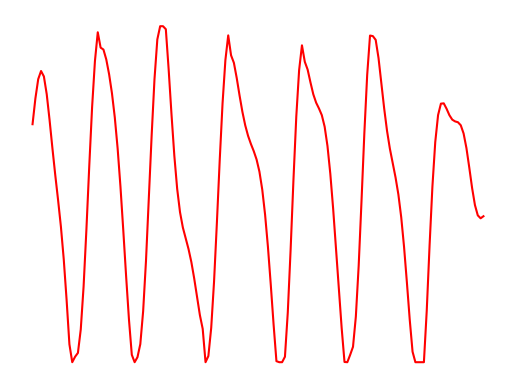

In [119]:
y2 = norm_bvp(bandpass_filter(tscantn(x[0][None])[0]))
plt.axis('off');
plt.plot(y, c='r')